# Final Project for AI 221

AI 221 | 1st Sem AY 2024-2025  
Students: Jemima Bian Anila, Joshua Cantor, Michael Spencer Quinto, MEng in AI  
Instructors: Dr. Miguel Remolona | Dr. Jon Dewitt Dalisay

## Dataset

https://data.mendeley.com/datasets/tsvdyhbphs/1

https://www.kaggle.com/datasets/jaydepaolomirandilla/philippine-medicinal-plant-leaf-dataset/data


In [4]:
import sys
from pathlib import Path
  
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import torch  
import cv2
import random



%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Add project root directory to Python path to allow importing from src folder
notebook_dir = Path("__file__").resolve().parent
project_root = Path.cwd().parent
sys.path.append(str(project_root))

In [6]:
print(torch.cuda.is_available())

True


# Import utility modules from `src` folder

Note: all reusable code like transformations for the dataframes, etc. can be found inside the `src` folder and are imported here for better modularity and version control


In [9]:
from src.utils_data import (
    PROCESSED_DATA_FOLDER,
    HIBISCUS_PROCESSED_FOLDER,
    AVERRHOEA_BILIMBI_PROCESSED_FOLDER,
    BG_REMOVED_DATA_FOLDER,
)

In [10]:
print(PROCESSED_DATA_FOLDER.relative_to(project_root))
print(HIBISCUS_PROCESSED_FOLDER.relative_to(project_root))

data/ph_med_plants_reduced_sizes
data/ph_med_plants_reduced_sizes/1Hibiscus rosa-sinensis(HRS)


# 1. Exploratory Data Analysis


## 1.1 Data Loading and Inspection


In [7]:
# Get list of files in HIBISCUS_PROCESSED_FOLDER
hibiscus_files = list(HIBISCUS_PROCESSED_FOLDER.glob("*.webp"))
hibiscus_files_names = [file.name for file in hibiscus_files]
print(hibiscus_files_names)

['Class1_19.webp', 'Class1_93.webp', 'Class1_3.webp', 'Class1_37.webp', 'Class1_80.webp', 'Class1_17.webp', 'Class1_23.webp', 'Class1_22.webp', 'Class1_25.webp', 'Class1_39.webp', 'Class1_33.webp', 'Class1_95.webp', 'Class1_16.webp', 'Class1_115.webp', 'Class1_49.webp', 'Class1_32.webp', 'Class1_110.webp', 'Class1_108.webp', 'Class1_84.webp', 'Class1_111.webp', 'Class1_116.webp', 'Class1_7.webp', 'Class1_77.webp', 'Class1_69.webp', 'Class1_73.webp', 'Class1_89.webp', 'Class1_63.webp', 'Class1_58.webp', 'Class1_105.webp', 'Class1_18.webp', 'Class1_75.webp', 'Class1_106.webp', 'Class1_112.webp', 'Class1_27.webp', 'Class1_11.webp', 'Class1_52.webp', 'Class1_34.webp', 'Class1_104.webp', 'Class1_35.webp', 'Class1_65.webp', 'Class1_102.webp', 'Class1_76.webp', 'Class1_97.webp', 'Class1_44.webp', 'Class1_72.webp', 'Class1_1.webp', 'Class1_42.webp', 'Class1_38.webp', 'Class1_28.webp', 'Class1_6.webp', 'Class1_30.webp', 'Class1_62.webp', 'Class1_81.webp', 'Class1_96.webp', 'Class1_114.webp', 'C

In [8]:
# Total number of (all ) images
# Get total number of images across all classes
# Get total number of images across all subfolders
total_images = sum(
    len(list(folder.glob("*.webp")))
    for folder in PROCESSED_DATA_FOLDER.iterdir()
    if folder.is_dir()
)
print(f"Total number of images: {total_images}")
print("--------------------------------")

# Get number of images per subfolder
for folder in PROCESSED_DATA_FOLDER.iterdir():
    if folder.is_dir():
        num_images = len(list(folder.glob("*.webp")))
        print(f"{folder.name}: {num_images} images")

print("--------------------------------")
# Get total number of folders
num_folders = sum(1 for folder in PROCESSED_DATA_FOLDER.iterdir() if folder.is_dir())
print(f"\nTotal number of folders: {num_folders}")

Total number of images: 4971
--------------------------------
8Pepromia pellucida(PP): 140 images
29Premna odorata(PO): 120 images
39Manihot esculenta(ME): 124 images
17Senna alata(SA): 118 images
33Citrus microcarpa(CM): 110 images
35Arachis hypogaea(AH): 130 images
10Coleus scutellarioides(CS): 120 images
23Pandanus amaryllifolius(PA): 108 images
1Hibiscus rosa-sinensis(HRS): 116 images
26Averrhoea bilimbi(AVB): 100 images
24Aloe barbadensis Miller(ABM): 130 images
16Carmona retusa(CR): 130 images
32Mangifera indica(MI): 110 images
22Nerium oleander(NO): 130 images
19Capsicum frutescens(CF): 126 images
4Vitex negundo(VN): 146 images
40Citrus maxima(CMA): 130 images
25Lagerstroemia speciosa(LS): 140 images
27Annona muricata(AM): 120 images
2Psidium guajava(PG): 110 images
30Gliricidia sepium(GS): 130 images
38Ipomoea batatas(IPB): 110 images
3Antidesma bunius(AB): 142 images
6Blumea balsamifera(BB): 110 images
28Citrus aurantiifolia(CIA): 116 images
21Ocimum basilicum(OB): 148 images


## 9 Random Hibiscus Images


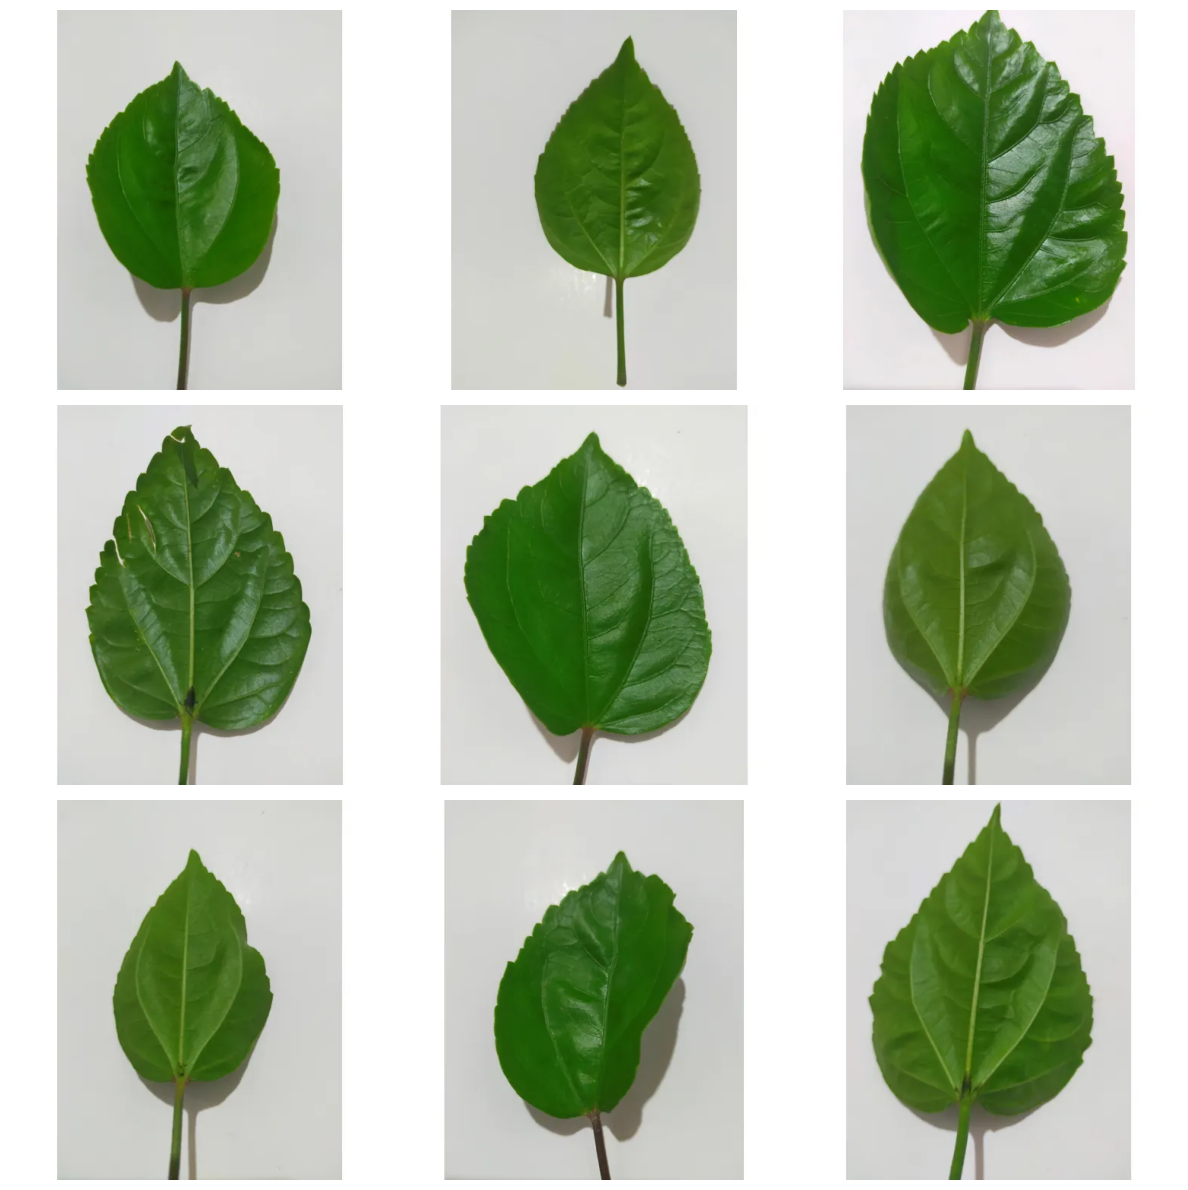

In [9]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Randomly sample 9 images
random_images = random.sample(hibiscus_files, 9)

# Plot each image
for idx, ax in enumerate(axes.flat):
    img = plt.imread(random_images[idx])
    ax.imshow(img)
    ax.axis("off")

# Adjust layout and display
plt.tight_layout()
plt.show()

## 9 random averrhoea bilimbi images


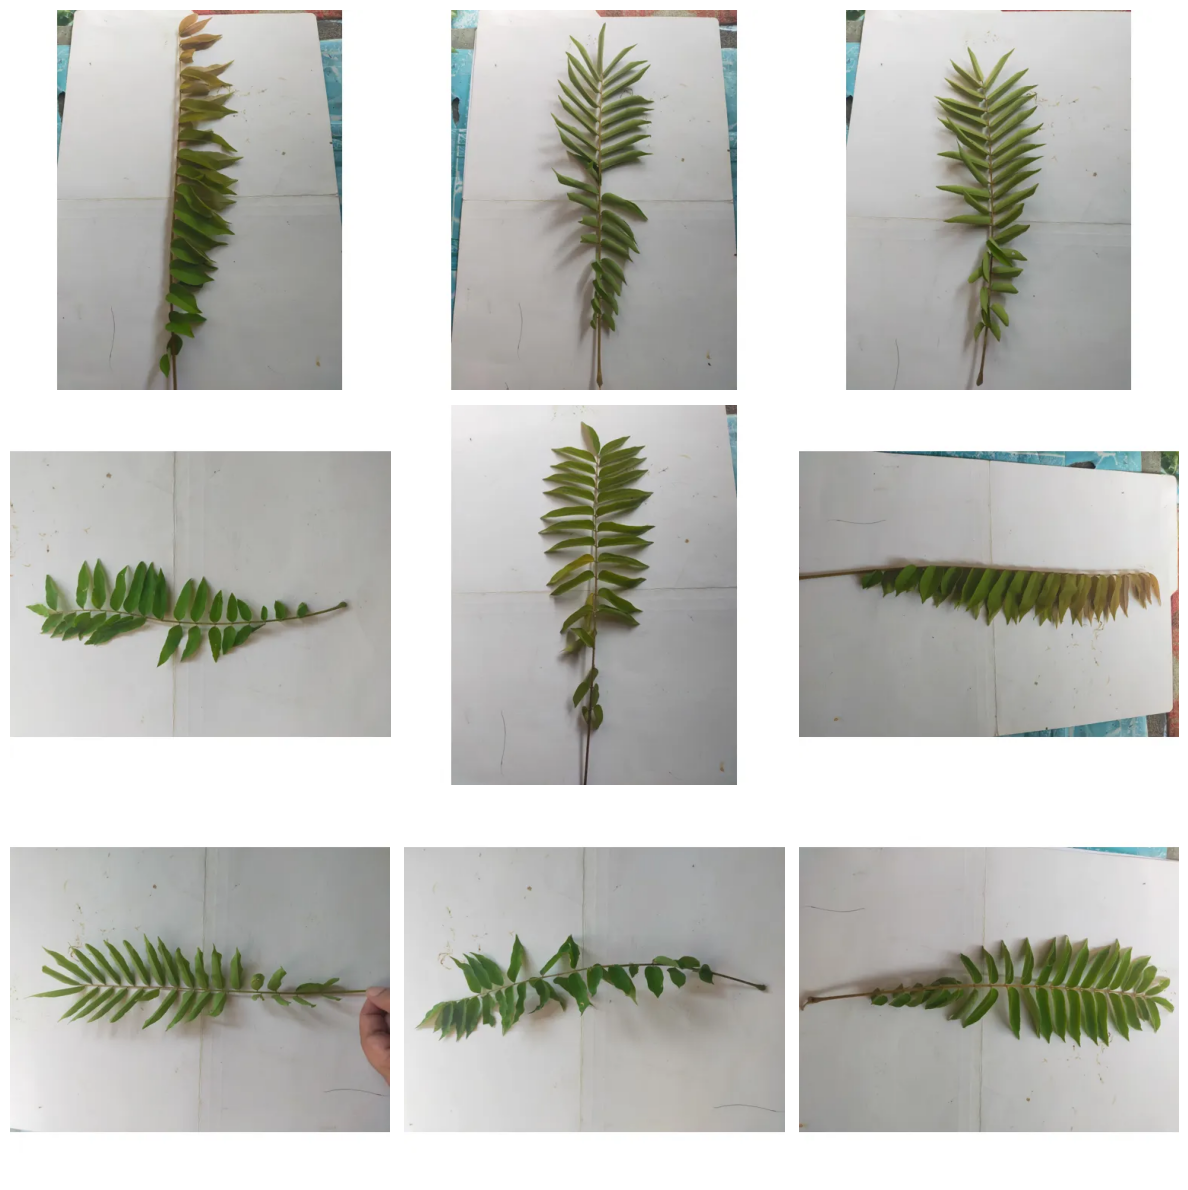

In [10]:
averrhoea_bilimbi_files = list(AVERRHOEA_BILIMBI_PROCESSED_FOLDER.glob("*.webp"))

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Randomly sample 9 images
random_images = random.sample(averrhoea_bilimbi_files, 9)

# Plot each image
for idx, ax in enumerate(axes.flat):
    img = plt.imread(random_images[idx])
    ax.imshow(img)
    ax.axis("off")

# Adjust layout and display
plt.tight_layout()
plt.show()

In [11]:
# Get all class folders in the processed data directory
class_folders = list(PROCESSED_DATA_FOLDER.glob("*"))
class_folders_names = sorted([folder.name for folder in class_folders])


print("Folders in the processed data directory:")
for folder in class_folders_names:
    print(f"{folder}")

Folders in the processed data directory:
10Coleus scutellarioides(CS)
11Phyllanthus niruri(PN)
12Corchorus olitorius(CO)
13Momordica charantia (MC)
14Euphorbia hirta(EH)
15Curcuma longa(CL)
16Carmona retusa(CR)
17Senna alata(SA)
18Mentha cordifolia Opiz(MCO)
19Capsicum frutescens(CF)
1Hibiscus rosa-sinensis(HRS)
20Jatropha curcas(JC)
21Ocimum basilicum(OB)
22Nerium oleander(NO)
23Pandanus amaryllifolius(PA)
24Aloe barbadensis Miller(ABM)
25Lagerstroemia speciosa(LS)
26Averrhoea bilimbi(AVB)
27Annona muricata(AM)
28Citrus aurantiifolia(CIA)
29Premna odorata(PO)
2Psidium guajava(PG)
30Gliricidia sepium(GS)
31Citrus sinensis(CIS)
32Mangifera indica(MI)
33Citrus microcarpa(CM)
34Impatiens balsamina(IB)
35Arachis hypogaea(AH)
36Tamarindus indica(TI)
37Leucaena leucocephala(LL)
38Ipomoea batatas(IPB)
39Manihot esculenta(ME)
3Antidesma bunius(AB)
40Citrus maxima(CMA)
4Vitex negundo(VN)
5Moringa oleifera(MO)
6Blumea balsamifera(BB)
7Origanum vulgare(OV)
8Pepromia pellucida(PP)
9Centella asiati

In [11]:
from src.utils_data import LIST_OF_FOLDER_CLASSES

print(LIST_OF_FOLDER_CLASSES)

['1Hibiscus rosa-sinensis(HRS)', '2Psidium guajava(PG)', '3Antidesma bunius(AB)', '4Vitex negundo(VN)', '5Moringa oleifera(MO)', '6Blumea balsamifera(BB)', '7Origanum vulgare(OV)', '8Pepromia pellucida(PP)', '9Centella asiatica(CA)', '10Coleus scutellarioides(CS)', '11Phyllanthus niruri(PN)', '12Corchorus olitorius(CO)', '13Momordica charantia (MC)', '14Euphorbia hirta(EH)', '15Curcuma longa(CL)', '16Carmona retusa(CR)', '17Senna alata(SA)', '18Mentha cordifolia Opiz(MCO)', '19Capsicum frutescens(CF)', '20Jatropha curcas(JC)', '21Ocimum basilicum(OB)', '22Nerium oleander(NO)', '23Pandanus amaryllifolius(PA)', '24Aloe barbadensis Miller(ABM)', '25Lagerstroemia speciosa(LS)', '26Averrhoea bilimbi(AVB)', '27Annona muricata(AM)', '28Citrus aurantiifolia(CIA)', '29Premna odorata(PO)', '30Gliricidia sepium(GS)', '31Citrus sinensis(CIS)', '32Mangifera indica(MI)', '33Citrus microcarpa(CM)', '34Impatiens balsamina(IB)', '35Arachis hypogaea(AH)', '36Tamarindus indica(TI)', '37Leucaena leucoceph

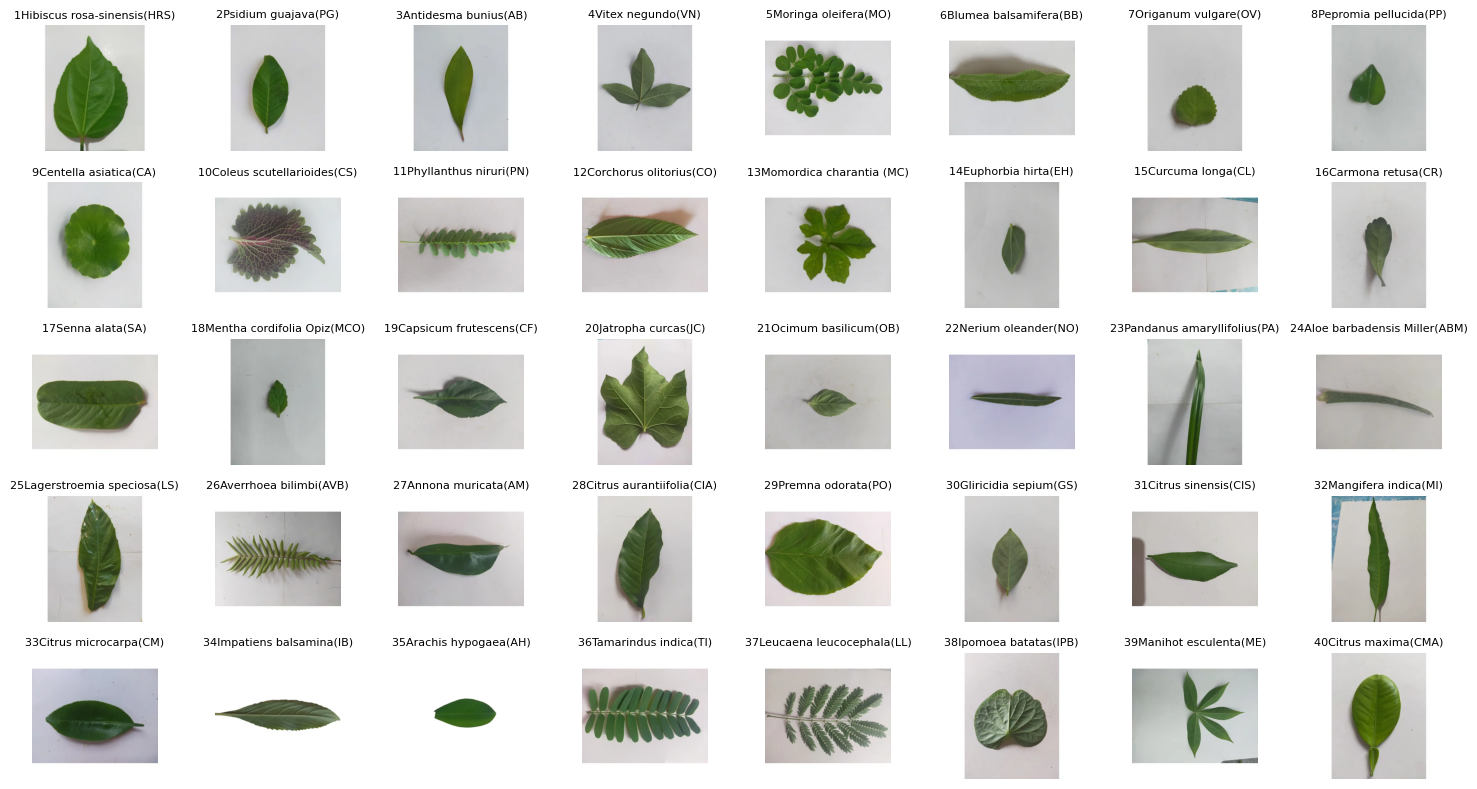

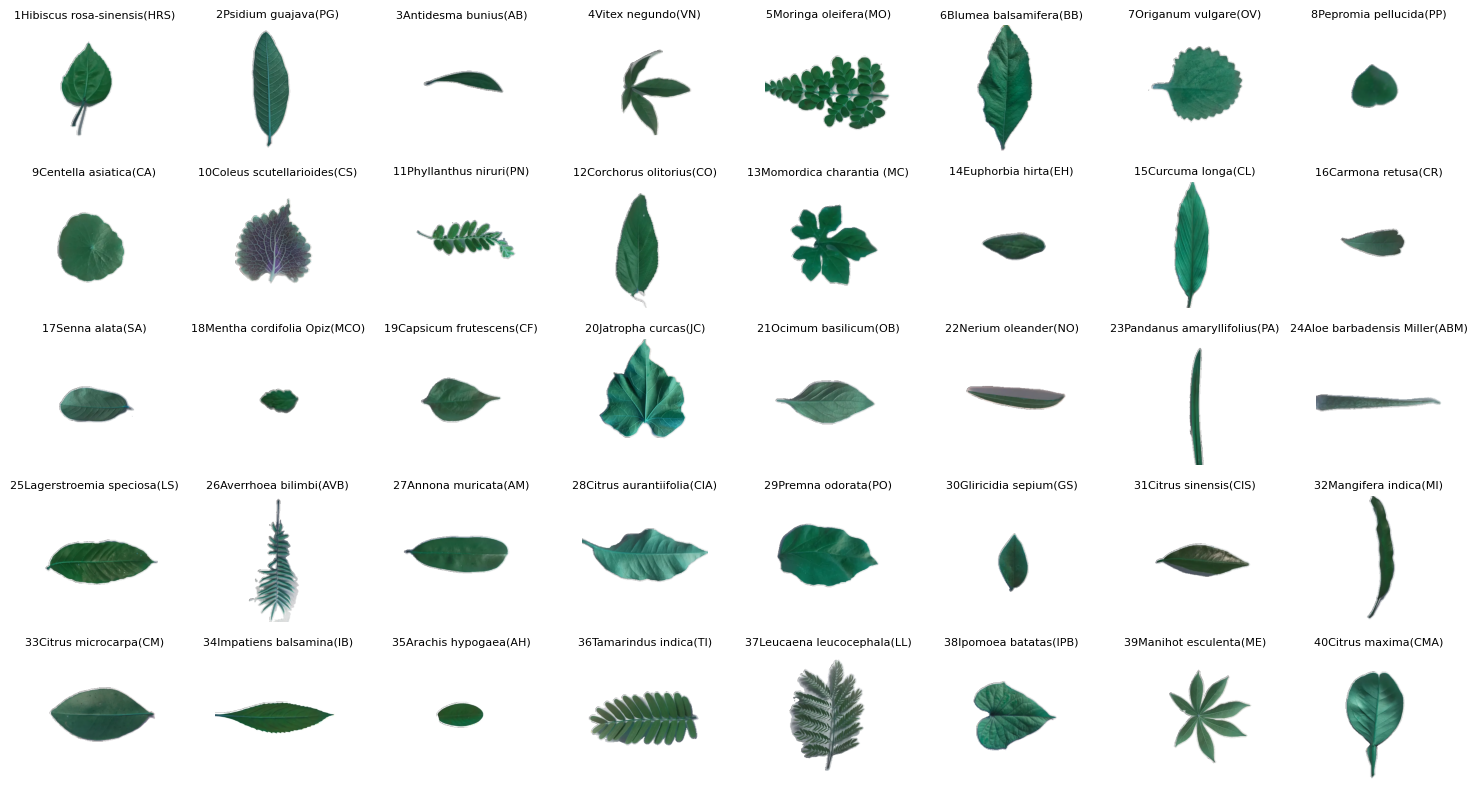

In [13]:
from src.utils_data import (
    plot_random_raw_images_grid,
    class_folders,
    removed_bg_class_folders,
    get_random_images_from_each_class,
    RAW_DATA_DF,
    REMOVED_BG_DATA_DF,
)


# get 1 random image from each class folder (40 images in total)
plot_random_raw_images_grid(class_folders)
plot_random_raw_images_grid(removed_bg_class_folders)

## Visualizing Preprocessing


In [1]:
# List of the paths of the 40 random images
random_images_40 = get_random_images_from_each_class(class_folders)

NameError: name 'get_random_images_from_each_class' is not defined

In [2]:
from src.utils_preprocessing import preprocess_leaf_image
from src.utils_plotting import plot_5x8_grid, plot_images_side_by_side


unprocessed_images = [plt.imread(img) for img in random_images_40]
preprocessed_images = [preprocess_leaf_image(img) for img in unprocessed_images]

plot_images_side_by_side(unprocessed_images[5], preprocessed_images[5])
plot_images_side_by_side(unprocessed_images[26], preprocessed_images[26])
plot_images_side_by_side(unprocessed_images[27], preprocessed_images[27])
plot_images_side_by_side(unprocessed_images[37], preprocessed_images[37])


# Display the unprocessed images
plot_5x8_grid(unprocessed_images)

# Display the preprocessed images
plot_5x8_grid(preprocessed_images)

ModuleNotFoundError: No module named 'src'

# Testing Feature Extraction


## Testing BG Removal


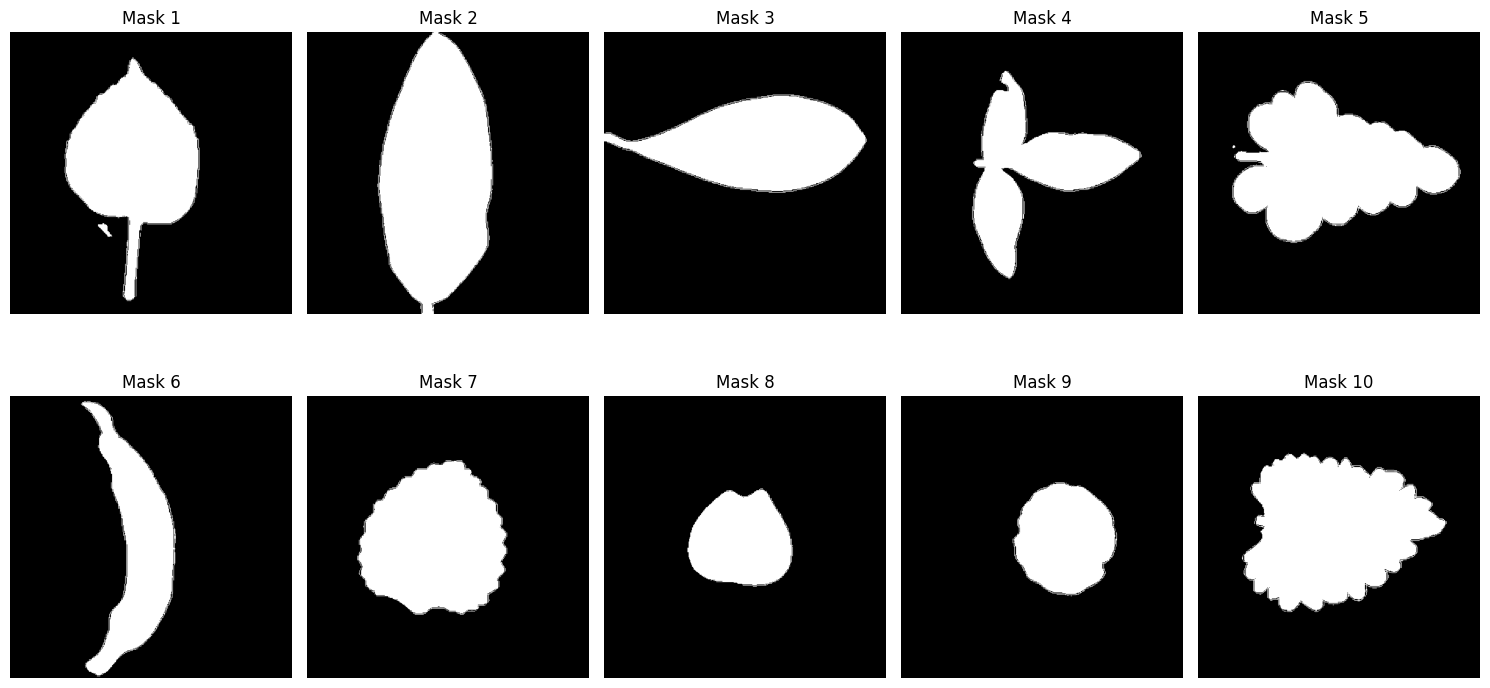

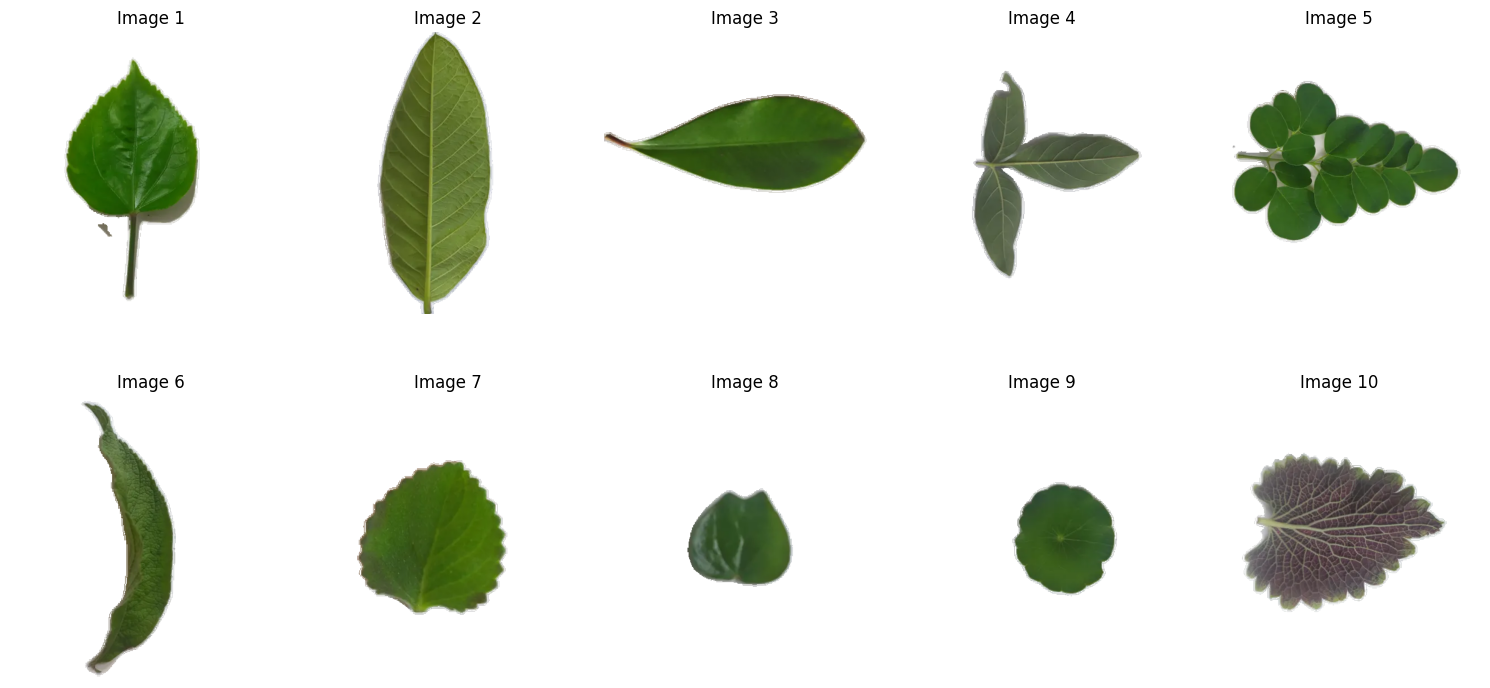

In [63]:
from src.utils_preprocessing import (
    extract_texture_features,
    create_bg_rem_mask,
    remove_background,
)

random_images_10 = random_images_40[:10]

# First preprocess the images
preprocessed_images = [
    preprocess_leaf_image(plt.imread(img)) for img in random_images_10
]
unprocessed_images = [plt.imread(img) for img in random_images_10]


# # Test 1: On the preprocessed images
# bg_masks_10 = [create_bg_rem_mask(img) for img in preprocessed_images]
# bg_removed_images_10 = [
#     remove_background(img, mask) for img, mask in zip(preprocessed_images, bg_masks_10)
# ]

# Test 2: On the unprocessed images
bg_masks_10 = [create_bg_rem_mask(img) for img in unprocessed_images]
bg_removed_images_10 = [
    remove_background(img, mask) for img, mask in zip(unprocessed_images, bg_masks_10)
]

# Plot the masks
plt.figure(figsize=(15, 8))
for i, mask in enumerate(bg_masks_10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(mask, cmap="gray")
    plt.title(f"Mask {i+1}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# Plot the background removed images
plt.figure(figsize=(15, 8))
for i, img in enumerate(bg_removed_images_10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.axis("off")
plt.tight_layout()
plt.show()

## Shape Features


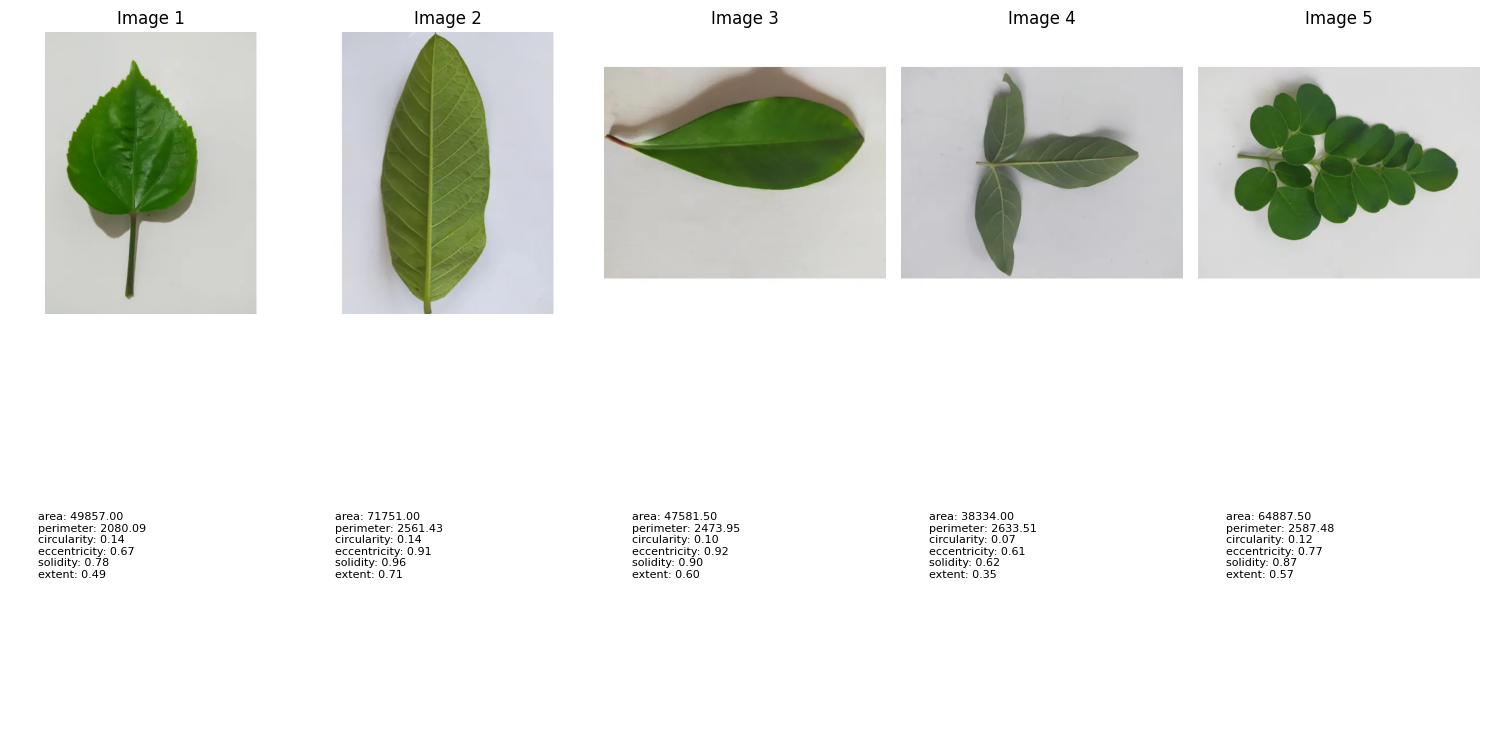

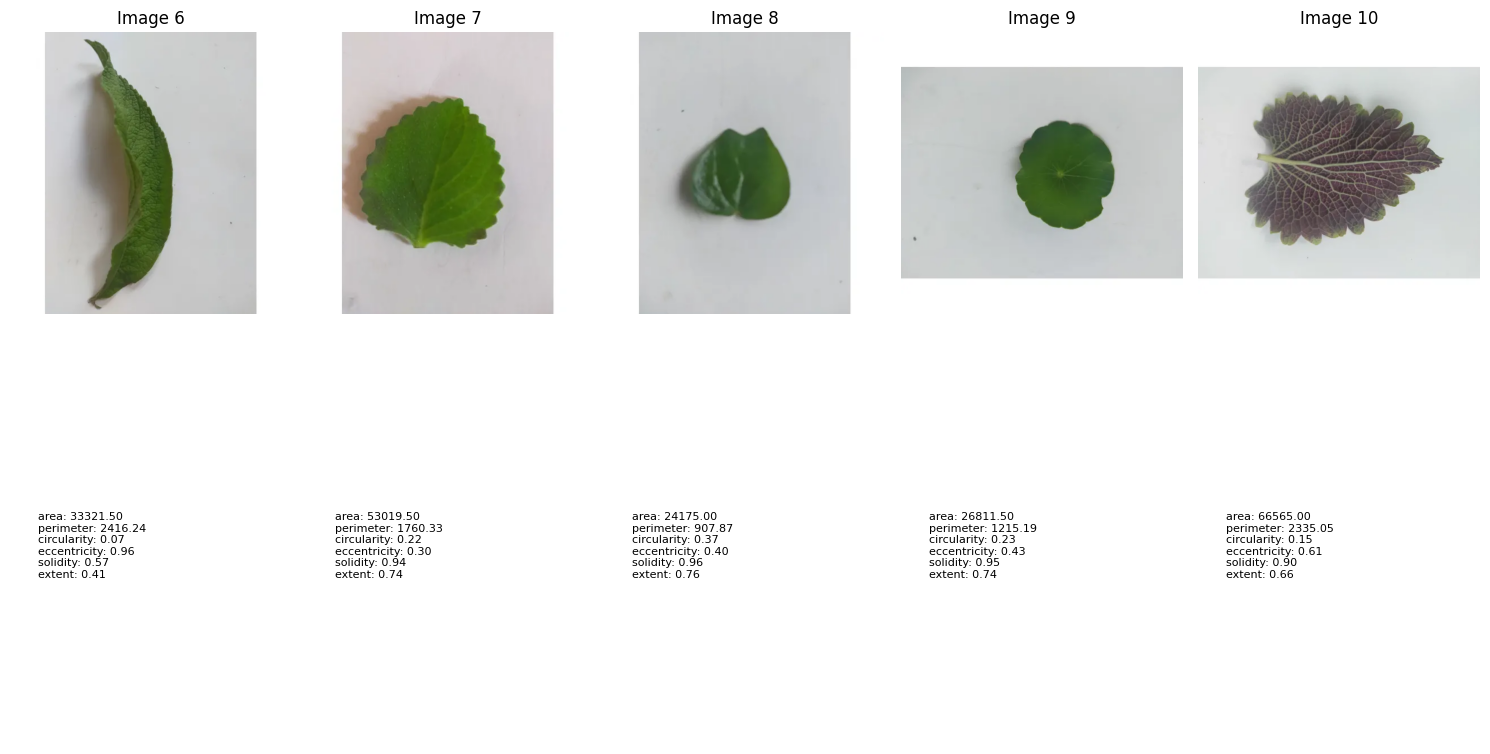

In [68]:
from src.utils_preprocessing import extract_shape_features
from src.utils_plotting import plot_images_with_features

random_images_10 = random_images_40[:10]

# random_image_10_sample = random_images_10[0]
# random_image_10_sample = plt.imread(random_image_10_sample)
# print(random_image_10_sample.shape)

# # Note: extract_shape_features() expects a numpy array with the removed background (i.e. RGBA format, i.e. 4 channels with an alpha channel)
# # Extract shape features from 10 random images
# shape_features = [
#     # extract_shape_features(preprocess_leaf_image(plt.imread(img)))
#     extract_shape_features(plt.imread(img))
#     for img in random_images_10
# ]

shape_features_on_bg_removed_images = [
    extract_shape_features(img) for img in bg_removed_images_10
]

# plot_images_with_features(random_images_10, shape_features)
plot_images_with_features(random_images_10, shape_features_on_bg_removed_images)

## Texture Features


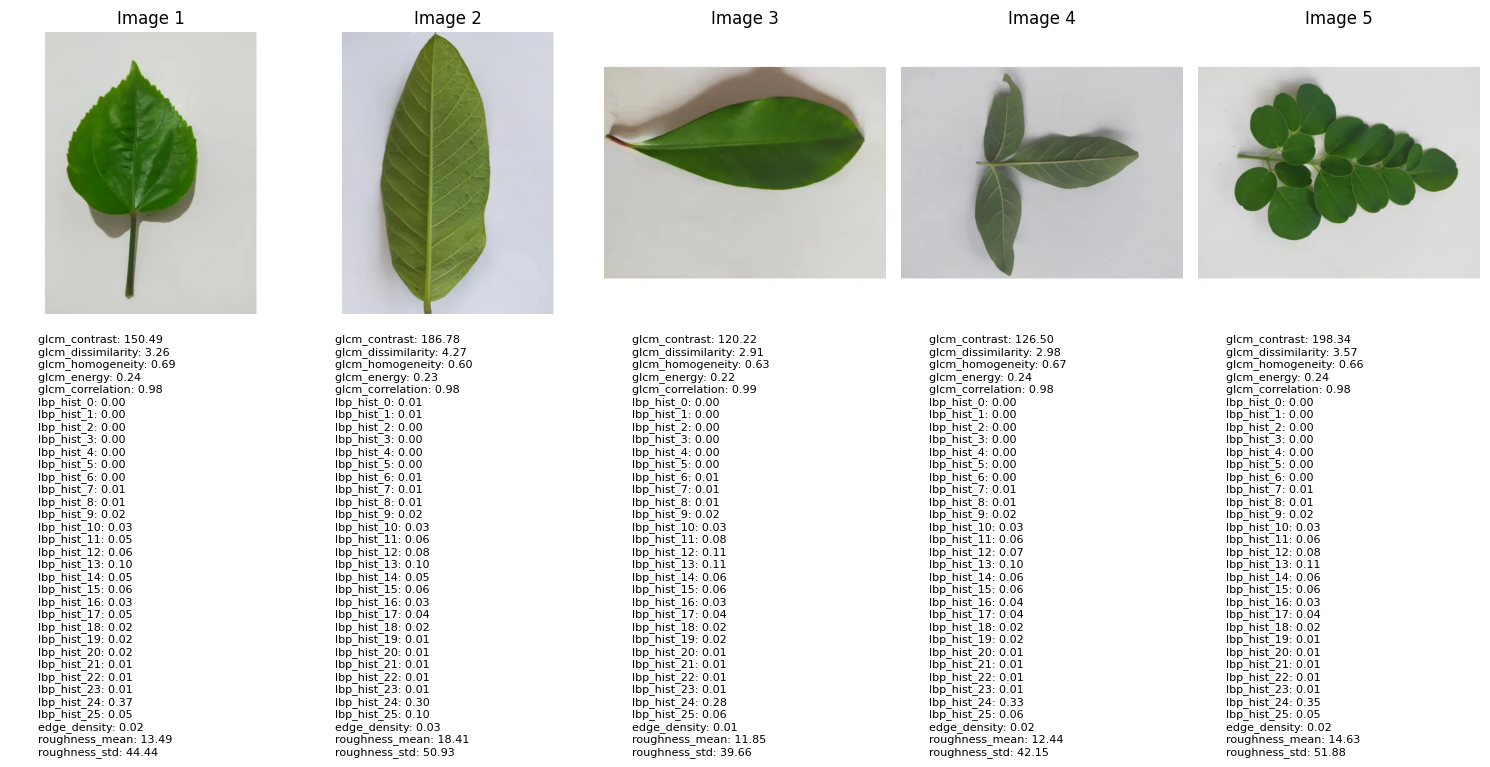

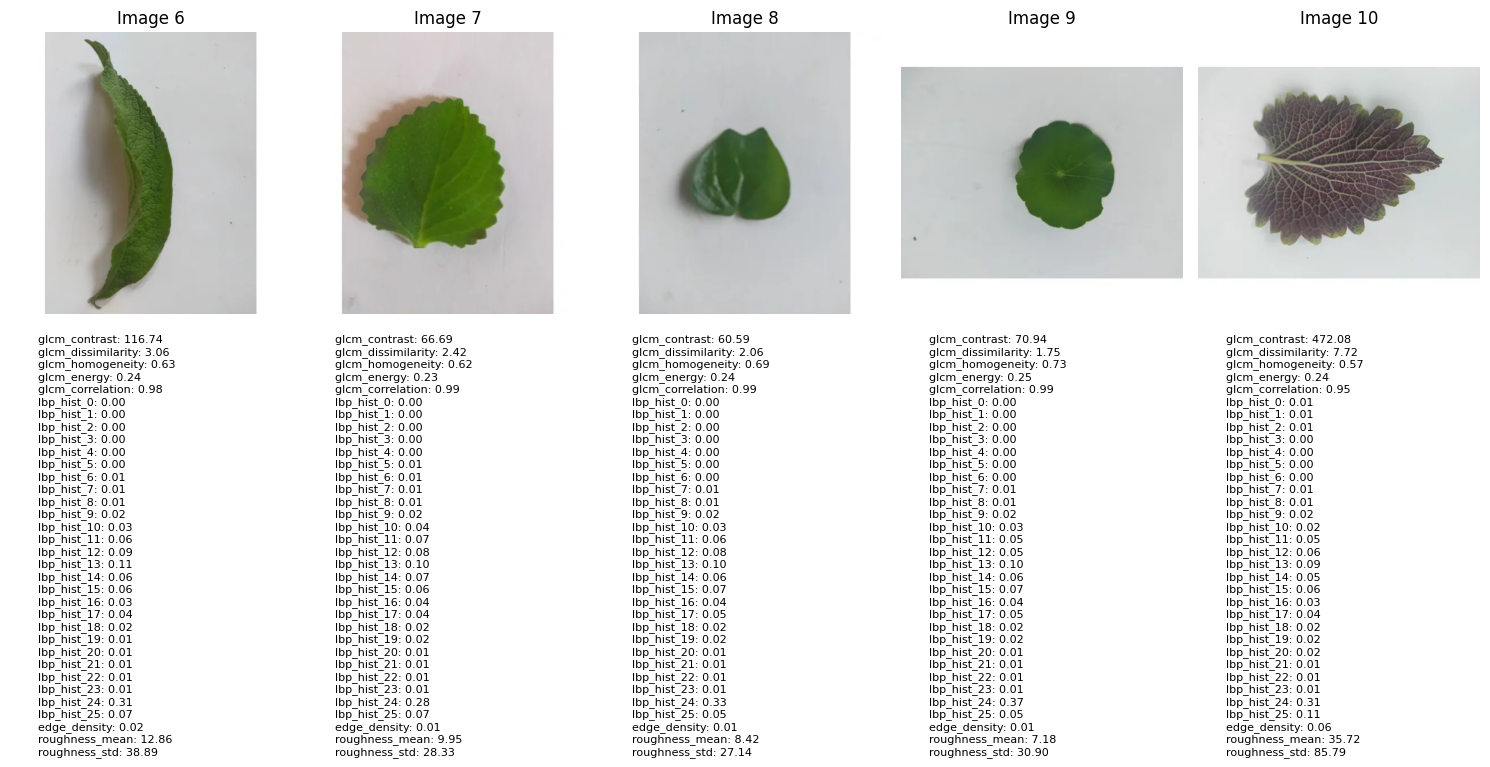

In [69]:
random_images_10 = random_images_40[:10]

# Extract shape features from 10 random images
texture_features = [
    # extract_shape_features(preprocess_leaf_image(plt.imread(img)))
    # extract_shape_features(plt.imread(img))
    # extract_texture_features(plt.imread(img))
    extract_texture_features(preprocess_leaf_image(plt.imread(img)))
    for img in random_images_10
]


# Call the function with our data
plot_images_with_features(random_images_10, texture_features)

## Color Features


In [70]:
from src.utils_preprocessing import (
    extract_color_features,
)
from src.utils_plotting import plot_images_with_features

random_images_10 = random_images_40[10:22]

# Extract shape features from 10 random images
color_features = [
    extract_color_features(preprocess_leaf_image(plt.imread(img)))
    for img in random_images_10
]


# # Call the function with our data
# plot_images_with_features(random_images_10, color_features)
display(color_features[0])
display(color_features[1])

{'rgb_0_mean': 199.483288,
 'rgb_0_std': 43.50440272787405,
 'rgb_0_skewness': -0.8729343138717978,
 'rgb_1_mean': 199.215424,
 'rgb_1_std': 41.7639612165827,
 'rgb_1_skewness': -0.6073658331460997,
 'rgb_2_mean': 195.427584,
 'rgb_2_std': 48.663440855769174,
 'rgb_2_skewness': -1.0983151659668635,
 'hsv_0_mean': 36.611236,
 'hsv_0_std': 55.71069730807814,
 'hsv_0_skewness': 1.6568535945186322,
 'hsv_1_mean': 11.472132,
 'hsv_1_std': 28.594460711378638,
 'hsv_1_skewness': 4.472995218704492,
 'hsv_2_mean': 201.083816,
 'hsv_2_std': 40.74001648107354,
 'hsv_2_skewness': -0.6506773508425879,
 'lab_0_mean': 203.951492,
 'lab_0_std': 39.861685099528046,
 'lab_0_skewness': -0.8712015860815941,
 'lab_1_mean': 127.376456,
 'lab_1_std': 4.552529942797082,
 'lab_1_skewness': -3.8507737650092837,
 'lab_2_mean': 130.087668,
 'lab_2_std': 5.397510381812712,
 'lab_2_skewness': 3.6939561681659168,
 'rgb_0_hist_0': 0.0,
 'rgb_0_hist_1': 0.0002119999990100041,
 'rgb_0_hist_2': 0.0007960000075399876,
 '

{'rgb_0_mean': 187.467388,
 'rgb_0_std': 64.63977376551883,
 'rgb_0_skewness': -0.9275201839620565,
 'rgb_1_mean': 186.23796,
 'rgb_1_std': 57.51129787301275,
 'rgb_1_skewness': -0.5692832680067575,
 'rgb_2_mean': 172.314848,
 'rgb_2_std': 80.69037379227399,
 'rgb_2_skewness': -0.8430090966229475,
 'hsv_0_mean': 73.703344,
 'hsv_0_std': 71.62530968322345,
 'hsv_0_skewness': 0.3410718069480942,
 'hsv_1_mean': 47.303628,
 'hsv_1_std': 68.56319833582455,
 'hsv_1_skewness': 1.2844388029364335,
 'hsv_2_mean': 192.746604,
 'hsv_2_std': 56.19953724424414,
 'hsv_2_skewness': -0.8364906573913632,
 'lab_0_mean': 190.846976,
 'lab_0_std': 57.26488340733283,
 'lab_0_skewness': -0.7544086121957395,
 'lab_1_mean': 126.060488,
 'lab_1_std': 10.150978928253963,
 'lab_1_skewness': -1.1338371585240399,
 'lab_2_mean': 135.9531,
 'lab_2_std': 13.515337228127164,
 'lab_2_skewness': 1.224658099378249,
 'rgb_0_hist_0': 0.0,
 'rgb_0_hist_1': 0.0,
 'rgb_0_hist_2': 0.0,
 'rgb_0_hist_3': 0.0,
 'rgb_0_hist_4': 0.

## Vein Features


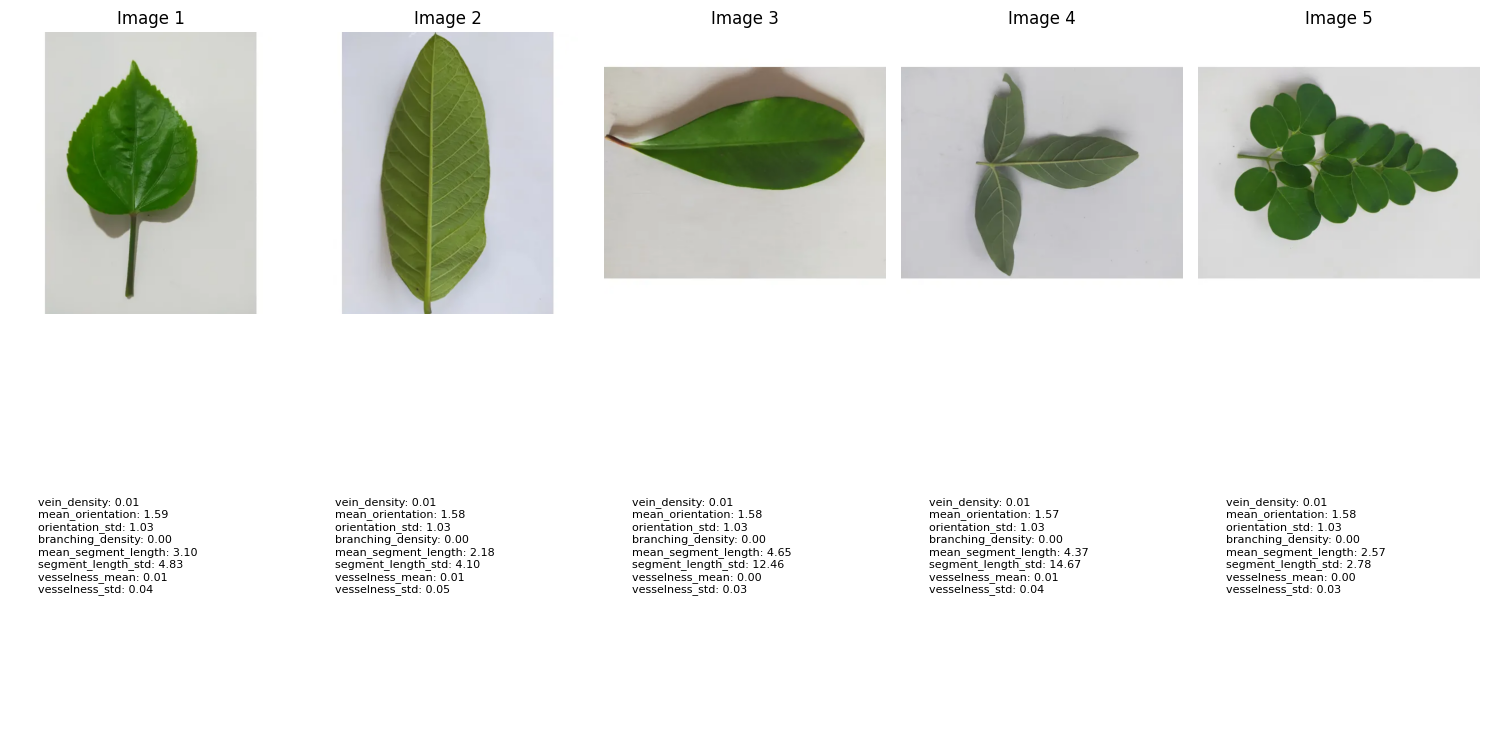

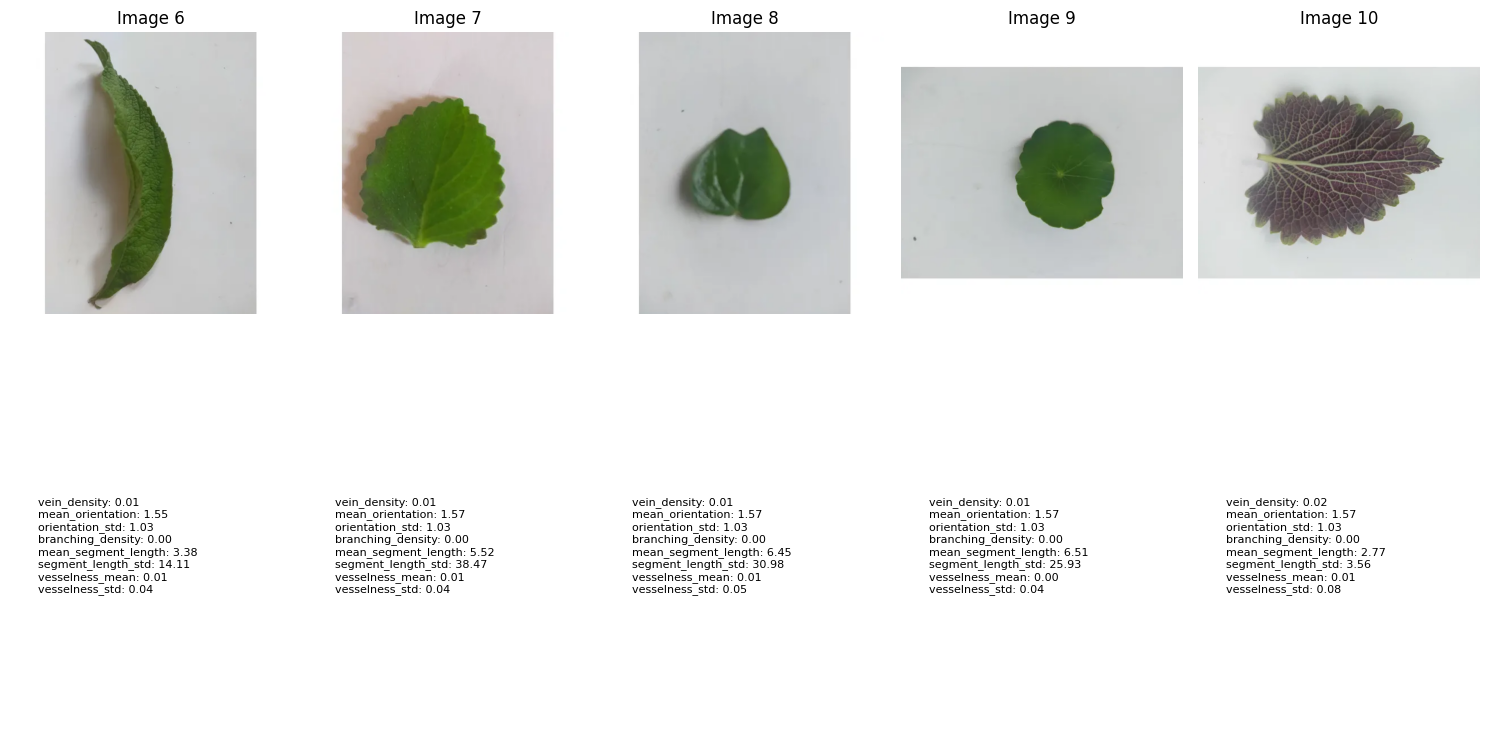

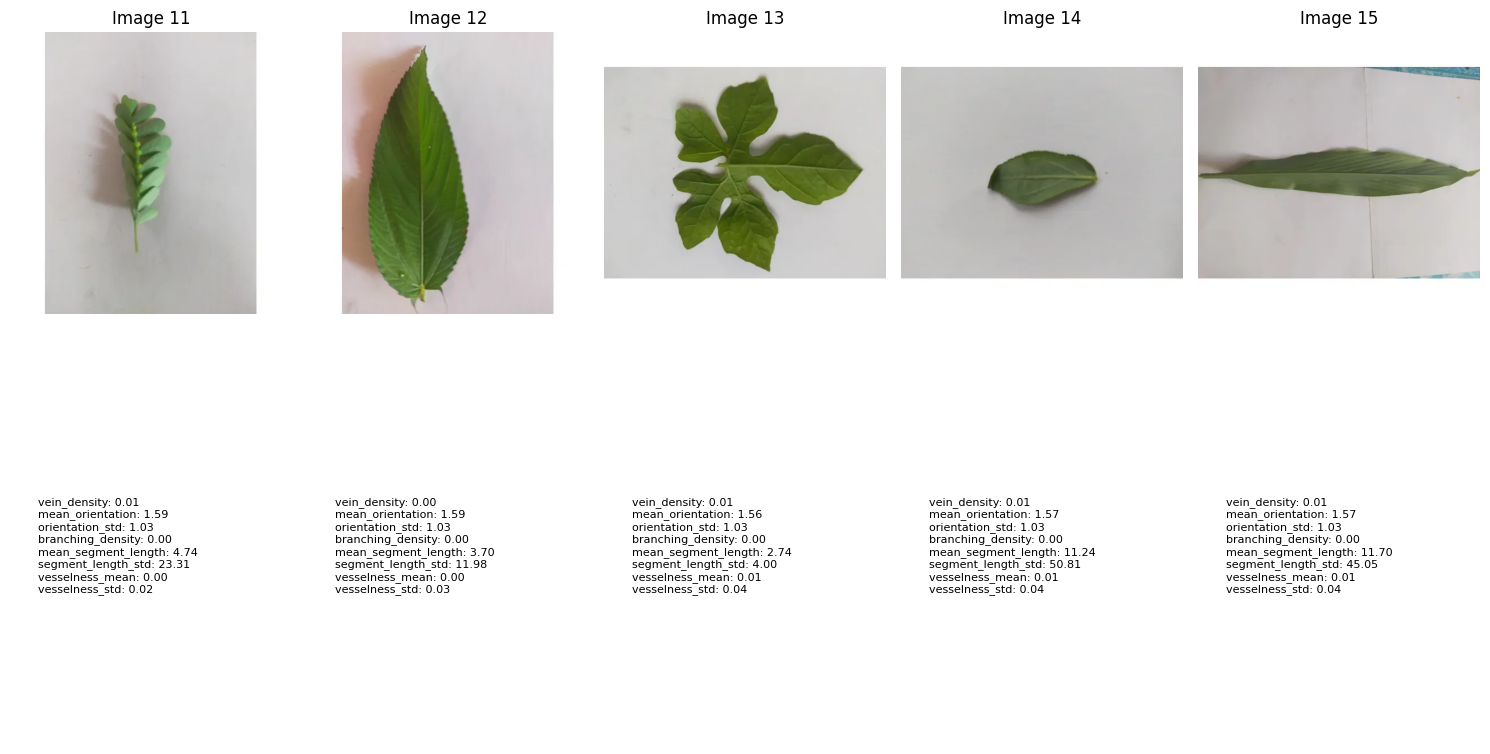

In [71]:
from src.utils_preprocessing import extract_vein_features

random_images_10 = random_images_40[:15]

# Extract shape features from 10 random images
vein_features = [
    extract_vein_features(preprocess_leaf_image(plt.imread(img)))
    for img in random_images_10
]


# Call the function with our data
plot_images_with_features(random_images_10, vein_features)

# Extracting all features


In [28]:
from src.utils_preprocessing import extract_all_features, create_feature_dataset

# Test extracting all features from a single image
all_features = extract_all_features(random_images_10[0])
display(all_features)
display(len(all_features))

# Test extracting features on random 10 images

{'rgb_0_mean': 190.526508,
 'rgb_0_std': 69.43450549493339,
 'rgb_0_skewness': -1.2895173543377707,
 'rgb_1_mean': 199.954432,
 'rgb_1_std': 52.254885126248034,
 'rgb_1_skewness': -1.0589947858926578,
 'rgb_2_mean': 181.532452,
 'rgb_2_std': 81.85991279538294,
 'rgb_2_skewness': -1.3249418167748412,
 'hsv_0_mean': 29.52742,
 'hsv_0_std': 17.566010592721387,
 'hsv_0_skewness': -0.5664243666561218,
 'hsv_1_mean': 42.720408,
 'hsv_1_std': 81.81795727292106,
 'hsv_1_skewness': 1.7878877468184629,
 'hsv_2_mean': 200.0152,
 'hsv_2_std': 52.20706918569553,
 'hsv_2_skewness': -1.0603415202660462,
 'lab_0_mean': 201.794044,
 'lab_0_std': 53.93726253830522,
 'lab_0_skewness': -1.1825990450913637,
 'lab_1_mean': 121.65834,
 'lab_1_std': 11.968756010730605,
 'lab_1_skewness': -1.7304529825893828,
 'lab_2_mean': 136.3241,
 'lab_2_std': 14.397149828698737,
 'lab_2_skewness': 1.6976113641160064,
 'rgb_0_hist_0': 0.0,
 'rgb_0_hist_1': 2.8000000384054147e-05,
 'rgb_0_hist_2': 0.000623999978415668,
 'rg

371